In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
#check for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
#description of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [8]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


**Exploratory Data Analysis**

<AxesSubplot: >

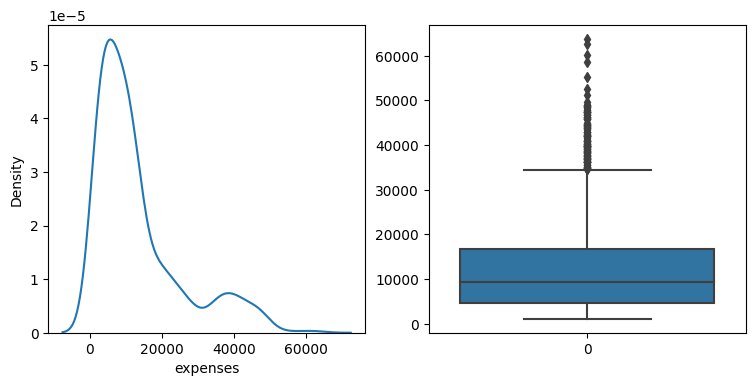

In [9]:
#Checking the distribution of the expenses(target variable)
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.kdeplot(df['expenses'])
plt.subplot(1,2,2)
sns.boxplot(df['expenses'])


In [10]:
from scipy.stats import skew,kurtosis
print("Skew : {}".format(skew(df['expenses'])))
print("kurtosis : {}".format(kurtosis(df['expenses'])))

Skew : 1.5141797167430497
kurtosis : 1.5958213684180036


*Analysis of skewness*
* The skewness value is positive. It means that the distribution is right skewed and mean,median is greater than the mode
* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed. *If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.
* Here it can be concluded that the expenses are highly skewed.

*Analysis of Kurtosis*
* Kurtosis gives the information about the tails or outliers of the distribution
* If Kurtosis is > 3, Distribution is longer, tails are fatter which means that data are heavy-tailed or profusion of outliers
* If Kurtosis is < 3, Distribution is shorter, tails are thinner than the normal distribution which means that data are light-tailed or lack of outliers.
* If Kurtosis is = 3, Distributions is normally distributed
* Here it can be concluded that there are less/negligible outliers as the value of Kurtosis is less than 3

<AxesSubplot: xlabel='children', ylabel='Count'>

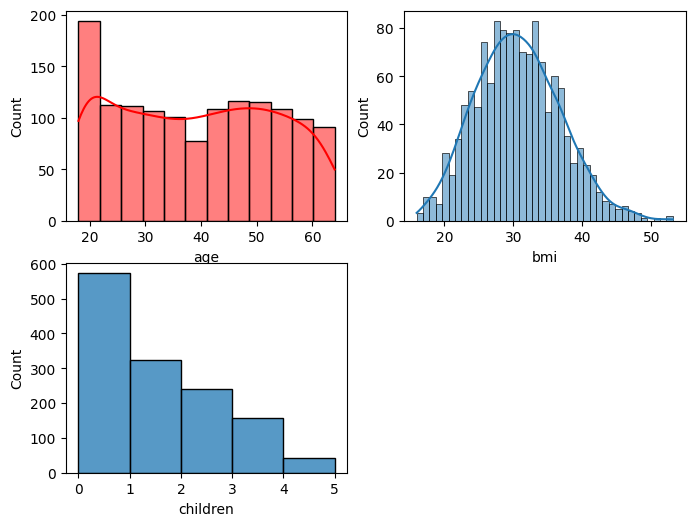

In [11]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(data=df['age'],color='red',kde=True)

plt.subplot(2,2,2)
sns.histplot(data=df['bmi'],bins=40,kde=True)

plt.subplot(2,2,3)
sns.histplot(data=df['children'],bins=5)

<AxesSubplot: xlabel='bmi', ylabel='expenses'>

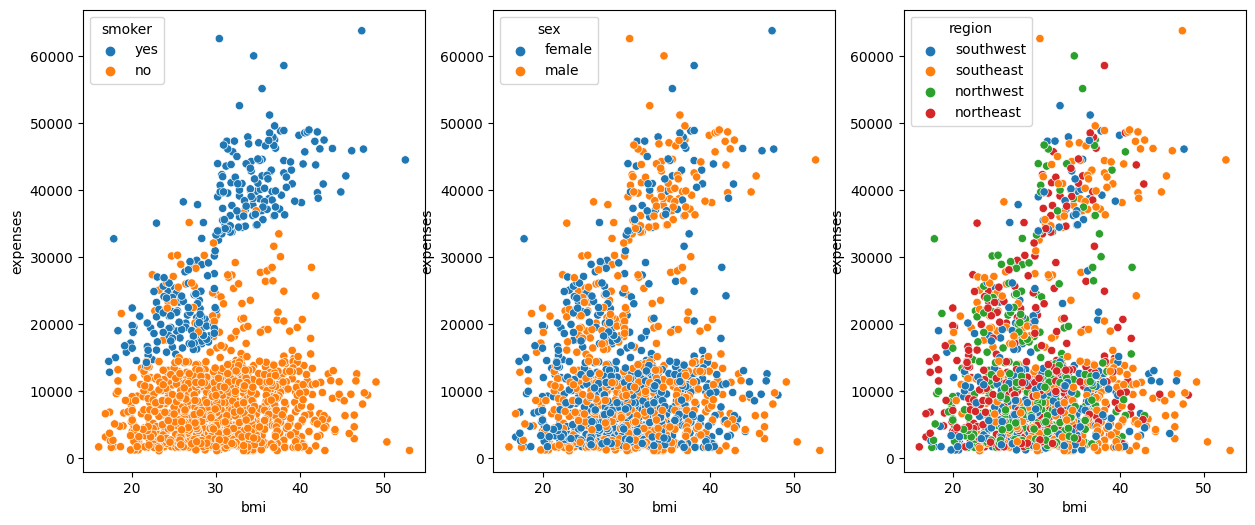

In [12]:
fig,axes = plt.subplots(ncols=3,figsize=(15,6))



sns.scatterplot(x='bmi',y='expenses',hue='smoker',ax=axes[0],data=df)
sns.scatterplot(x='bmi',y='expenses',hue='sex',ax=axes[1],data=df)
sns.scatterplot(x='bmi',y='expenses',hue='region',ax=axes[2],data=df)

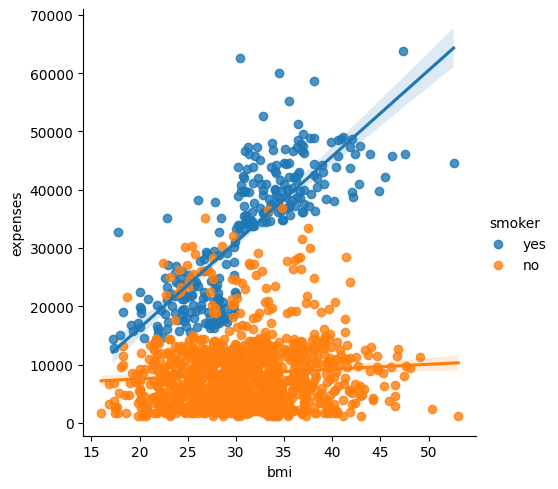

In [13]:
sns.lmplot(x='bmi',y='expenses',data=df,hue='smoker')

<AxesSubplot: xlabel='sex', ylabel='expenses'>

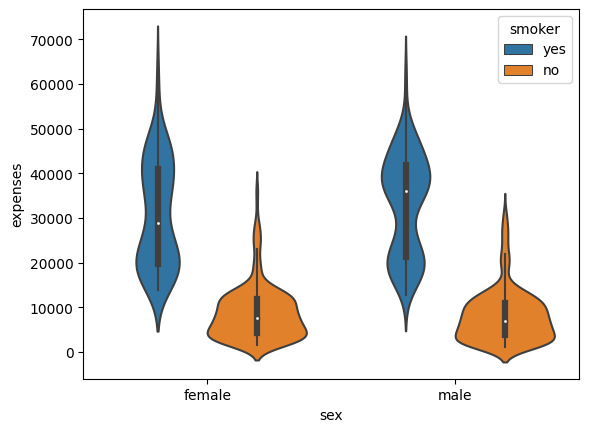

In [14]:
sns.violinplot(x='sex',y='expenses',data=df,hue='smoker')

Insights: 
* People who smoke has higher expenses compared to people who does'nt smoke.
* bmi shows some sort of positive co-relation with expenses.



<AxesSubplot: xlabel='children', ylabel='expenses'>

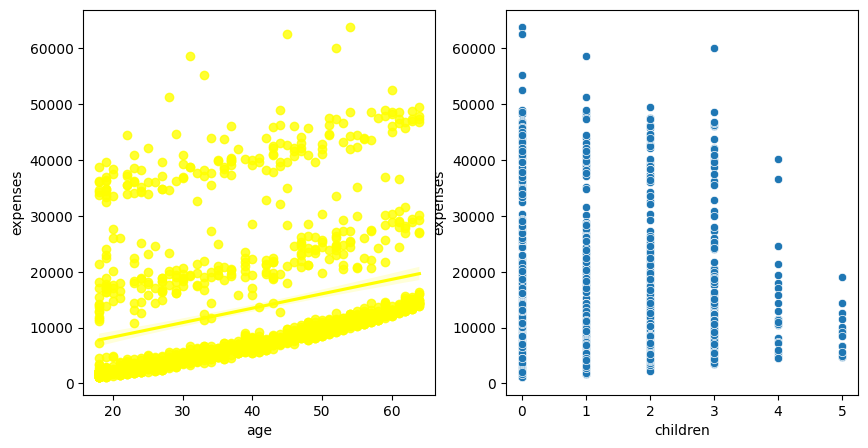

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.regplot(x='age',y='expenses',data=df,color='yellow')
plt.subplot(1,2,2)
sns.scatterplot(x='children',y='expenses',data=df)

Insights :
* Expenses has kind of positive co-relation with age

<AxesSubplot: xlabel='sex', ylabel='expenses'>

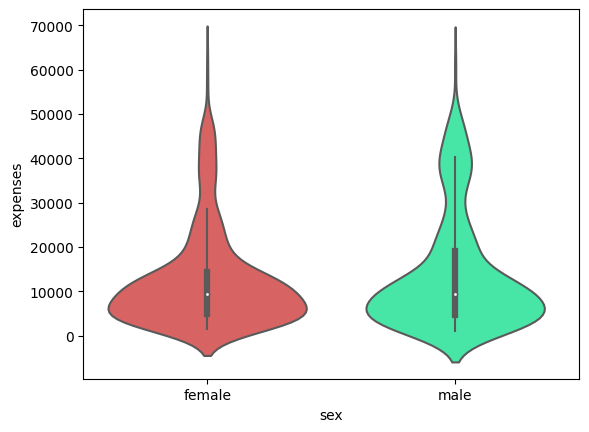

In [16]:
palette=['#EB5050','#2DFFAB'] 
sns.violinplot(x='sex',y='expenses',palette=palette,data=df)

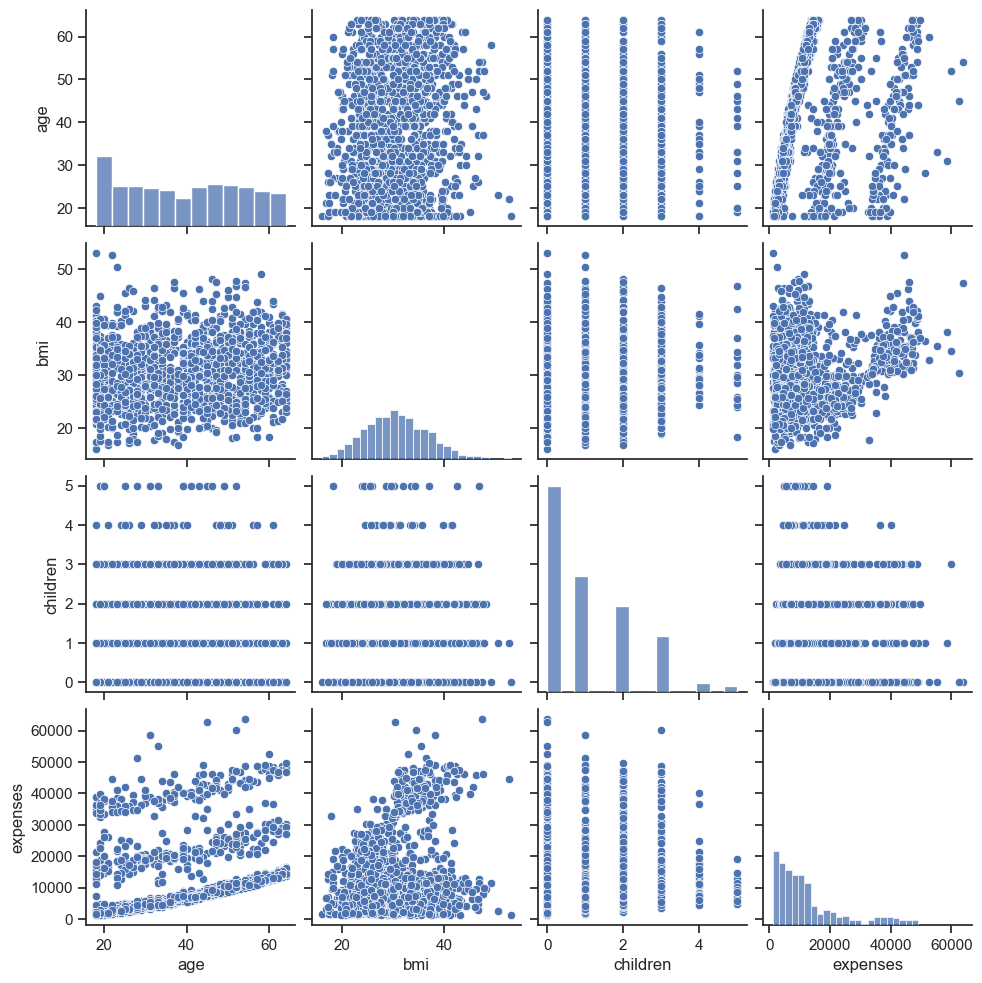

In [17]:
palette=['#EB5050','#2DFFAB'] 
sns.set(style="ticks")
sns.pairplot(data=df, palette=palette)

<AxesSubplot: >

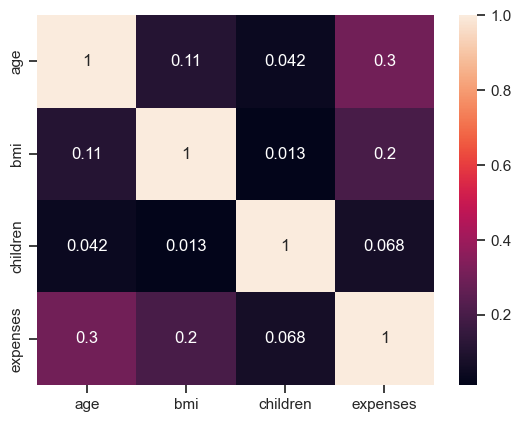

In [18]:
#Finding the correlation
sns.heatmap(df.corr(),annot=True)

**Feature Engineering**

In [19]:
#Encoding Categorical Variable
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

In [20]:
df= pd.get_dummies(data=df,columns=['region'],drop_first=True)

In [21]:
X = df.drop('expenses',axis=1)
y = df['expenses']

In [22]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [23]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
#pickling the scaler object
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

**Model Training and Model Testing**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
y_pred = linear_regressor.predict(X_test)
print("Linear Regression Model Summary")
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy of the model",r2_score(y_test,y_pred))

Linear Regression Model Summary
Mean Squared Error:  35116554.28433197
Mean Absolute Error:  4243.46574150859
Root Mean Squared Error:  5925.922230702321
Accuracy of the model 0.7672722578855357


In [26]:
from sklearn.svm import SVR
support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000
                        )
support_vector_reg.fit(X_train,y_train)
y_pred = support_vector_reg.predict(X_test)
print("Support Vector Regression Model Summary")
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy of the model",r2_score(y_test,y_pred))

Support Vector Regression Model Summary
Mean Squared Error:  44758253.0856308
Mean Absolute Error:  3250.1357992285757
Root Mean Squared Error:  6690.160916273299
Accuracy of the model 0.7033738818089519


In [27]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(max_depth=5)
decision_tree_reg.fit(X_train,y_train)
y_pred = decision_tree_reg.predict(X_test)
print("Decision Tree Regression Model Summary")
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy of the model",r2_score(y_test,y_pred))

Decision Tree Regression Model Summary
Mean Squared Error:  23156544.821596976
Mean Absolute Error:  2753.034041222428
Root Mean Squared Error:  4812.124772031268
Accuracy of the model 0.8465347611309588


In [28]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators=200,max_depth=5)
random_forest_reg.fit(X_train,y_train)
y_pred = random_forest_reg.predict(X_test)
print("Random Forest Regression Model Summary")
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy of the model",r2_score(y_test,y_pred))

Random Forest Regression Model Summary
Mean Squared Error:  21165285.999452777
Mean Absolute Error:  2642.2278464669857
Root Mean Squared Error:  4600.574529279226
Accuracy of the model 0.8597314194901731


In [29]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[100,150,200,250,300,350,400],'max_depth':[2,3,4,5,6,7,8],
               'criterion':['squared_error', 'absolute_error', 'poisson']}]
grid_search = GridSearchCV(estimator=random_forest_reg,
                          param_grid=parameters,
                          scoring='r2',
                          n_jobs=-1)
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f"Best Accuracy: {best_accuracy.round(4)*100}")
print(f"Best_parameters: {best_parameters}")


Best Accuracy: 85.03
Best_parameters: {'criterion': 'poisson', 'max_depth': 4, 'n_estimators': 150}


In [30]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(criterion='poisson',n_estimators=400,max_depth=4)
random_forest_reg.fit(X_train,y_train)
y_pred = random_forest_reg.predict(X_test)
print("Random Forest Regression Model Summary")
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy of the model",r2_score(y_test,y_pred))

Random Forest Regression Model Summary
Mean Squared Error:  21594412.974494558
Mean Absolute Error:  2700.723809564385
Root Mean Squared Error:  4646.978908333301
Accuracy of the model 0.8568874687092035


In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
print("XG Boost Model Summary")
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Accuracy of the model",r2_score(y_test,y_pred))

XG Boost Model Summary
Mean Squared Error:  27391209.563669723
Mean Absolute Error:  2915.8421633355433
Root Mean Squared Error:  5233.661200695907
Accuracy of the model 0.8184703913737577


* The best performing model **Random Forest Regressor** with the r2_score of 0.86
* Next step would be to pickle the object containing the Random Forest Regressor model.

In [33]:
#pickling the file and dumping the pickled model
import pickle
pickle.dump(random_forest_reg,open('rfrmodel.pkl','wb'))